In [ ]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D209-Task2 

In [1]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.13.2')

## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation eg:confusion_matrix, classification_report, roc_auc_score, mean_squared_error



In [2]:
filePath = "../datasources/medical.csv"
df = pd.read_csv(filePath, index_col=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

# Remove features

In [3]:
# Remove data that is too granular
df = df.drop(columns=['CaseOrder','Customer_id', 'Interaction', 'UID', 'Zip', 'Lat', 'Lng'])
print("DF Shape (Rows,Columns)=", df.shape)

DF Shape (Rows,Columns)= (10000, 43)


# Handling Missing Values

In [4]:
def checkMisisngValues():
    nullseries = df.isna().sum().sort_values()
    print("\n Null Values: ", (nullseries[nullseries > 0]))
checkMisisngValues()


 Null Values:  Series([], dtype: int64)


In [8]:
print("InternetService=",df['InternetService'].unique())
df['InternetService'].describe(include='object')

InternetService= ['Fiber Optic' 'DSL' nan]


count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [9]:
#Input missing values using the most frequent category (mode)
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)

print(df.info())
checkMisisngValues()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

/var/folders/9f/8tw205ns3136cylcf2160v6c0000gn/T/ipykernel_81686/860511116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


In [92]:
# Select Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\ncategorical_feature: qnt_categories")
for column_name in categorical_features:
    print(column_name,":", df[column_name].nunique())
print("\n")


categorical_feature: qnt_categories
Area : 3
Marital : 5
Gender : 3
Churn : 2
Techie : 2
Contract : 3
Port_modem : 2
Tablet : 2
InternetService : 2
Phone : 2
Multiple : 2
OnlineSecurity : 2
OnlineBackup : 2
DeviceProtection : 2
TechSupport : 2
StreamingTV : 2
StreamingMovies : 2
PaperlessBilling : 2
PaymentMethod : 4




In [93]:
df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  int64  
 6   Contacts                               10000 non-null  int64  
 7   Yearly_equip_failure                   10000 non-null  int64  
 8   Tenure                                 10000 non-null  float64
 9   MonthlyCharge                          10000 non-null  float64
 10  Bandwidth_GB_Year                      10000 non-null  float64
 11  Are

In [94]:
print(df.columns)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


In [95]:
bool_columns_array = df.select_dtypes(include=['bool']).columns.to_list()
print(bool_columns_array)

for item in bool_columns_array:
    # convert Dtype from 'bool' to 'int64'
    df[item] = df[item].astype('int64')

print("\n")
df.info()
utils.writeDFToFile(df, "df_info_2_Transformed.txt")
df.to_csv('churn_2_Transformed.csv')

# Clear variables
del bool_columns_array, item


['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 

# Standardize data

In [5]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df.select_dtypes(include='number'))


# Visualize Correlations

ValueError: could not convert string to float: 'Eva'

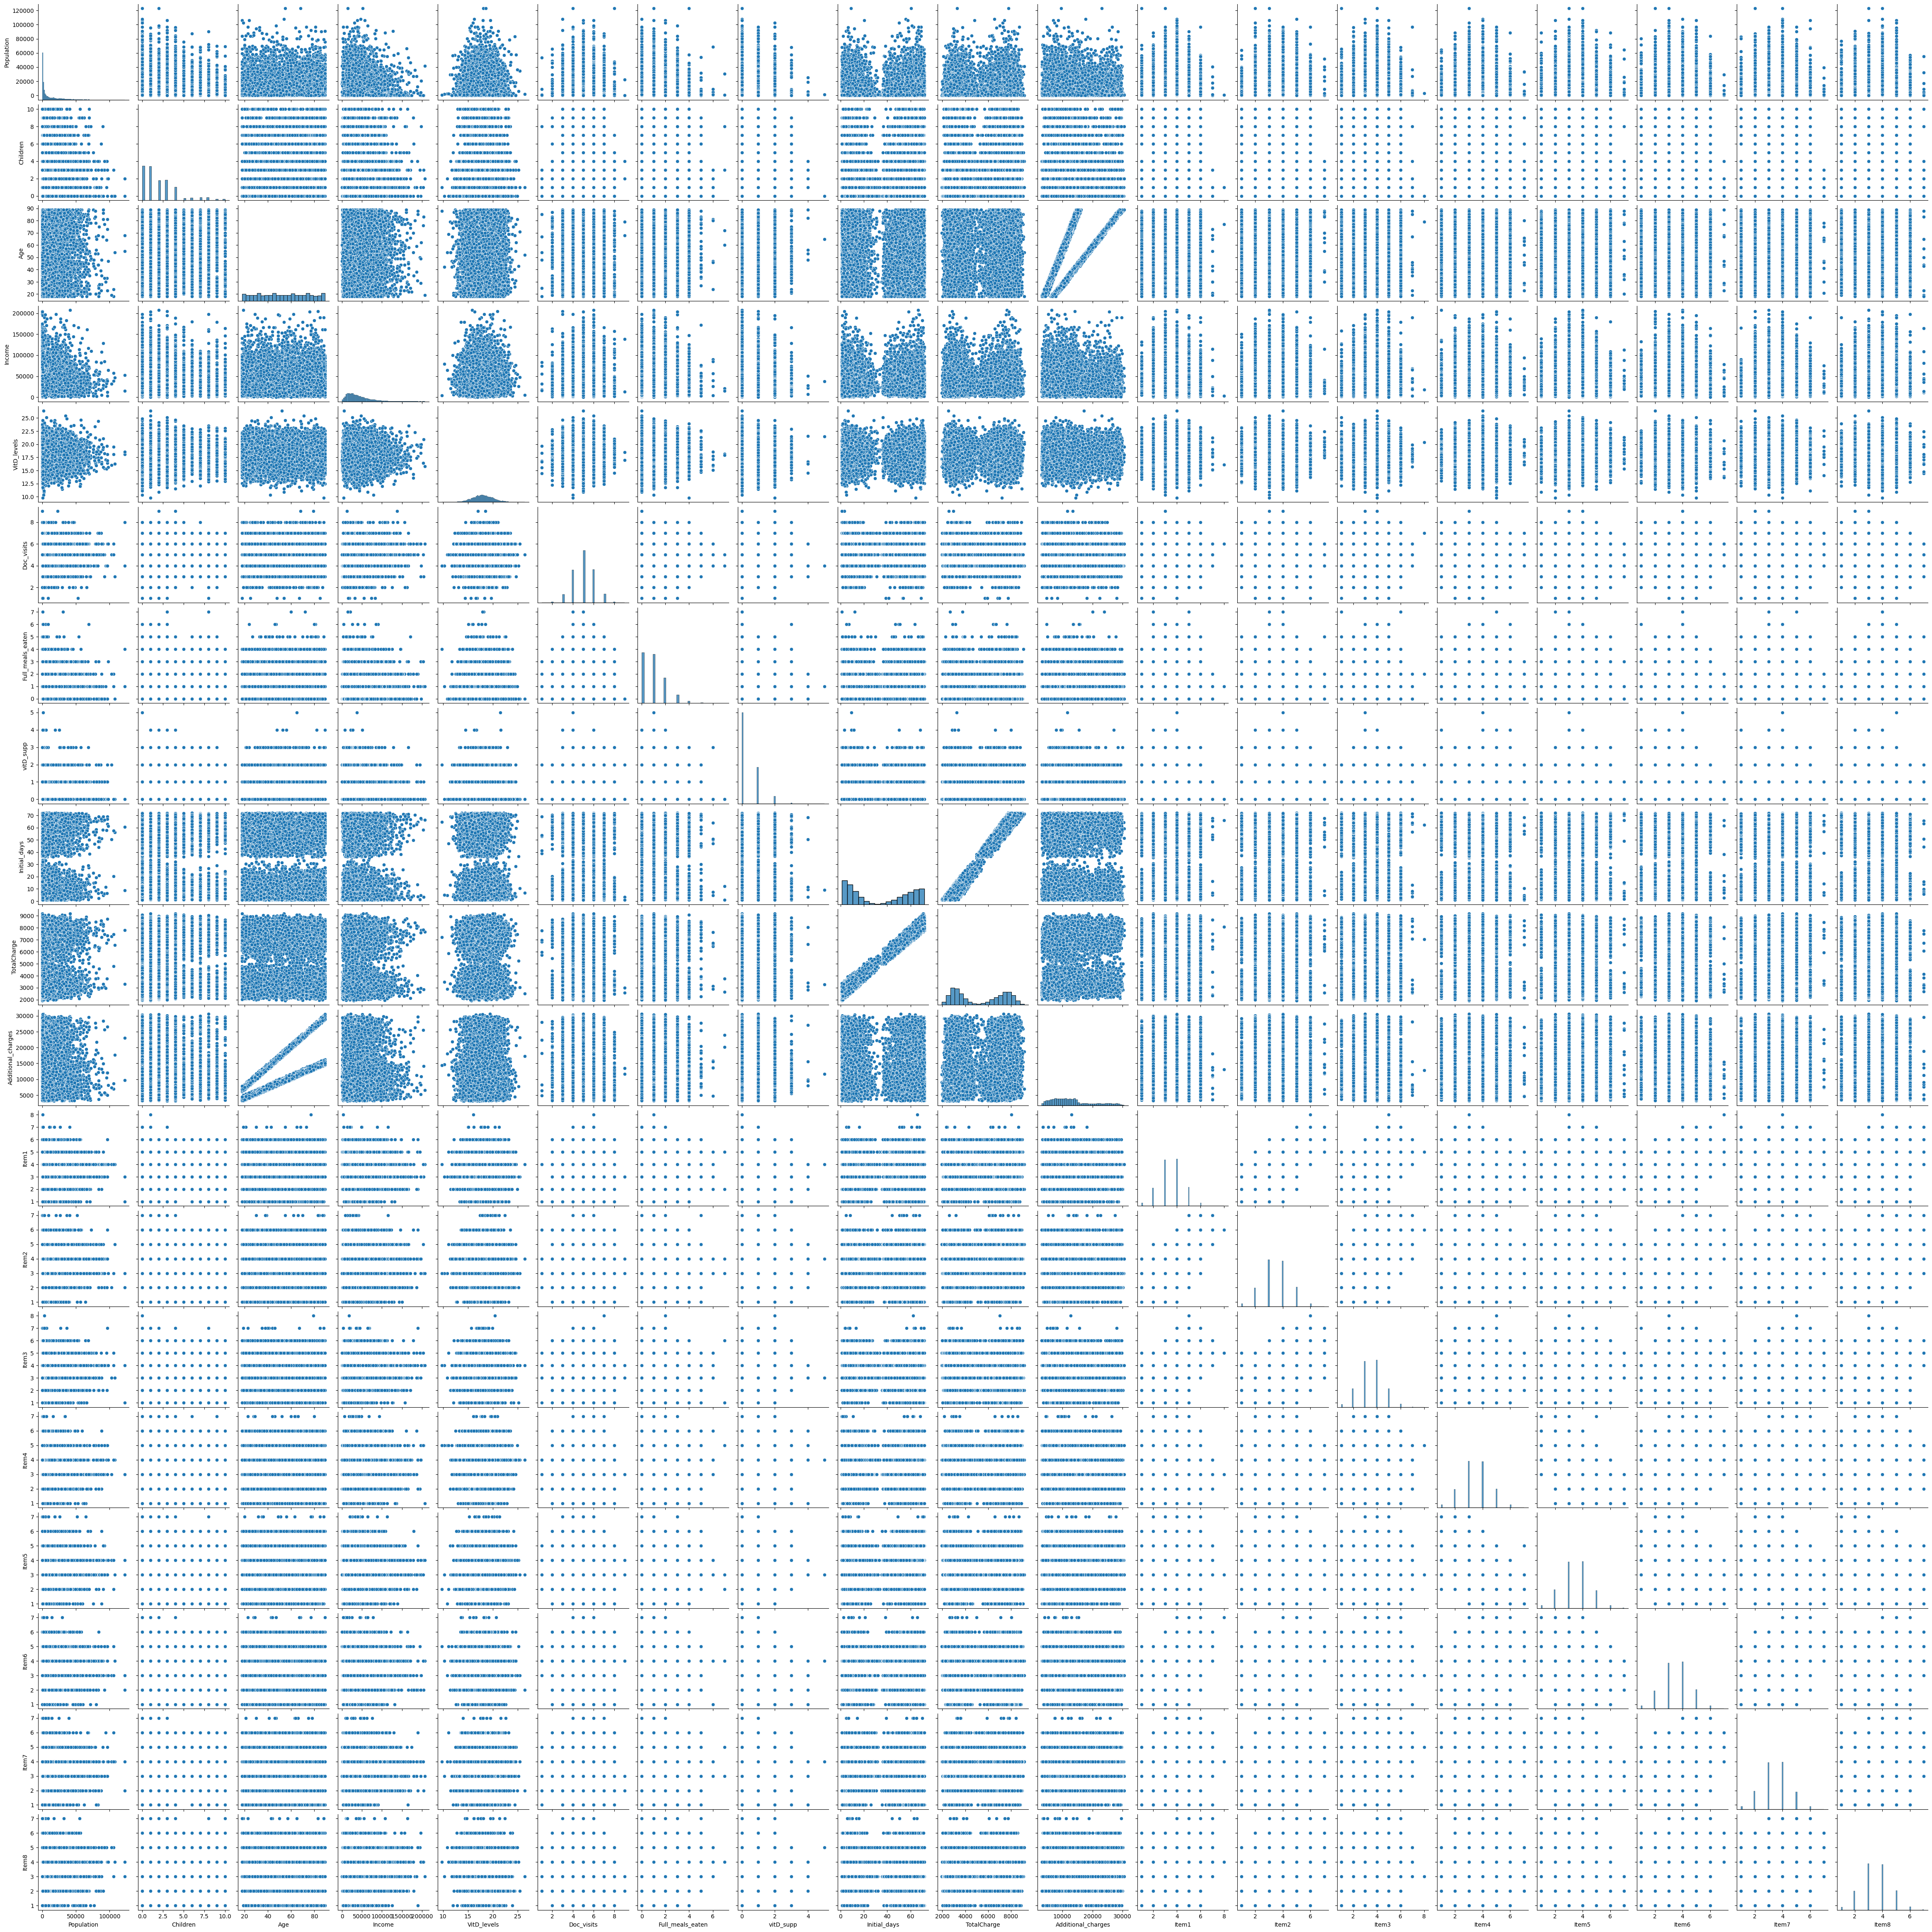

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)  # for small datasets
sns.heatmap(df.corr(), annot=True)

# Sampling Data

In [96]:
def sample_data(df):
    # 70% Trainig sample , 30% Test sample
    target = 'MonthlyCharge'
    Y = df[target] #target
    X = df.drop(target, axis=1) #Predictors
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    print('x_train:', x_train.shape)
    print('y_train:', y_train.shape)
    print('x_test:', x_test.shape)
    print('y_test:', y_test.shape)
    return X, Y, x_train, x_test, y_train, y_test
X, Y, x_train, x_test, y_train, y_test = sample_data(df)

x_train: (7000, 37)
y_train: (7000,)
x_test: (3000, 37)
y_test: (3000,)


# Build the Model